# Business Problem

Credit cards are great, convenient method of making payments, easier to carry than cash, helps you build a credit rating and are there if you need emergency cash. Banks provide these credit cards to an individual and determine the credit limit for each card based on certain factors. People are willing to spend more when paying with a credit card instead of cash. Lenders like to understand the factors driving the credit card spend. How can we use the data to understand what is driving the total spend, and given those factors predicting the credit limit for new applicants?

# Data Source

- https://www.kaggle.com/ankurv343/predict-credit-card-spent
- Data is avaliable in "Data Set.xlsx"
- "Data Dictionary.xlsx" provided helps to understand the data
- The data has been provided for 5000 customers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Data Set.xlsx")

In [3]:
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [4]:
#Display all the columns
df = pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_excel("Data Set.xlsx")

In [6]:
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [7]:
df.shape

(5000, 130)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(30), int64(98), object(2)
memory usage: 5.0+ MB


In [9]:
df.describe()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,4997.000000,5000.000000,5000.000000,2378.000000,5000.000000,2378.000000,5000.000000,5000.000000,1704.000000,5000.000000,1704.000000,5000.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.00000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.686800,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,2.9326,0.147600,54.759600,3.699909,2.392200,9.954160,1.857326,-0.130454,3.654460,0.696915,0.23420,2.964200,0.480200,6.112800,0.641400,2.204000,3.067400,0.500400,0.392400,0.110400,0.055600,0.114600,0.046600,1.847400,0.62960,1.84260,16.402400,3.272000,2.130600,0.641400,0.343800,23.232580,1.389400,0.221000,0.361000,2.996200,1.973400,25.345538,0.679000,0.102600,0.271800,0.406000,0.274600,0.095400,0.123400,0.383800,0.058400,0.188000,7.636800,4.08860,0.381400,0.238400,0.518000,2.714200,2.507000,2.505800,0.189800,16.655800,3.782200,2.774400,2.541200,2.534000,0.187200,13.084400,3.571400,337.202520,160.876110,0.466000,2.05860,38.204800,0.253200,13.471450,2.288779,708.871753,5.611298,0.475600,13.264450,3.243230,577.832510,6.584783,0.340800,12.991310,3.600238,470.176400,6.747296,0.716200,15.443850,2.909733,720.478391,6.426309,0.26880,10.701190,3.605001,421.984610,6.808132,0.488400,0.303000,0.243600,1.199600,0.475200,0.479000,0.480600,0.478000,0.348600,0.983000,19.645000,0.915600,0.913600,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.425872,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,1.4533,0.354739,55.377511,0.747072,1.221261,6.399783,3.4157

In [10]:
df.isnull().sum().sort_values(ascending = False)

lnwireten      3656
lnwiremon      3656
lnequipten     3296
lnequipmon     3296
lntollten      2622
               ... 
addresscat        0
address           0
hometype          0
homeown           0
response_03       0
Length: 130, dtype: int64

In [11]:
# Checking which columns have null values
[i for i in df.columns if df[i].isnull().any()]

['lncreddebt',
 'lnothdebt',
 'commutetime',
 'longten',
 'lnlongten',
 'lntollmon',
 'lntollten',
 'lnequipmon',
 'lnequipten',
 'lncardmon',
 'cardten',
 'lncardten',
 'lnwiremon',
 'lnwireten']

In [12]:
# Check for unique records

df['custid'].value_counts().head()

0109-POJOQC-B1R    1
8619-BKBHQZ-3WP    1
2649-IPDINN-U0N    1
4504-RYFMAL-H2T    1
7002-PINHGY-1E8    1
Name: custid, dtype: int64

Firstly, we are dropping the __custid__ column, as it is unique and is not helpful for our analysis

In [13]:
df.drop('custid', axis = 1, inplace = True)

In [14]:
df.head(2)

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.5,1.871802,34.4,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.9,2.186051,330.6,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.42866,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0


In [15]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 129 columns):
 #    Column             Dtype  
---   ------             -----  
 0    region             int64  
 1    townsize           int64  
 2    gender             int64  
 3    age                int64  
 4    agecat             int64  
 5    birthmonth         object 
 6    ed                 int64  
 7    edcat              int64  
 8    jobcat             int64  
 9    union              int64  
 10   employ             int64  
 11   empcat             int64  
 12   retire             int64  
 13   income             int64  
 14   lninc              float64
 15   inccat             int64  
 16   debtinc            float64
 17   creddebt           float64
 18   lncreddebt         float64
 19   othdebt            float64
 20   lnothdebt          float64
 21   default            int64  
 22   jobsat             int64  
 23   marital            int64  
 24   spoused            int64  
 

# Creating our dependent (target) variable

In [16]:
# The amount spent by customers each month on both of their cards (Primary and Secondary)

df['total_spend'] = df['cardspent'] + df['card2spent']

In [17]:
df['total_spend'].head(20)

0      149.46
1       77.54
2      359.97
3      359.41
4      507.83
5      228.27
6      952.46
7     1304.80
8      467.83
9      310.81
10     811.04
11     393.43
12     732.75
13     978.44
14     273.10
15     396.12
16     402.17
17    1294.06
18     586.78
19       8.11
Name: total_spend, dtype: float64

Some of the columns are encoded as numerical variables, but are actually categorical

In [18]:
#Loading the dictionary data
dict_df = pd.read_excel('Data Dictionary.xlsx')

In [19]:
#Extracting catagegorival variables from dictionary
cat_vars = dict_df[dict_df['Categorical Variable'].isnull() == False]['Categorical Variable']

In [20]:
df[cat_vars].head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,2,September,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5,0,2,May,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4,1,6,June,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3,0,2,May,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2,0,3,July,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


In [21]:
df[cat_vars].head().shape

(5, 84)

So, there are 84 total categorical variables

In [22]:
#Extracting numerical variables 
df_num_vars = df.drop(columns = cat_vars, axis = 1)
df_num_vars.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,cardspent,card2spent,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,81.66,67.80,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,42.60,34.94,39,8.90,2.186051,330.60,5.800909,0.0,NaN,0.00,NaN,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,184.22,175.75,65,28.40,3.346389,1858.35,7.527444,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,340.99,18.42,36,6.00,1.791759,199.45,5.295564,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,255.10,252.73,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,NaN,0.0,NaN,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [23]:
df_num_vars.shape

(5000, 46)

### Creating separate dataframes for categorical variables

In [24]:
df_cat_vars = df[cat_vars]
df_cat_vars.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,2,September,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5,0,2,May,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4,1,6,June,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3,0,2,May,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2,0,3,July,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


In [25]:
df_num_vars.isnull().sum().sort_values(ascending = False)

lnwireten         3656
lnwiremon         3656
lnequipten        3296
lnequipmon        3296
lntollten         2622
lntollmon         2622
lncardten         1422
lncardmon         1419
longten              3
lnlongten            3
commutetime          2
cardten              2
lncreddebt           1
lnothdebt            1
tollmon              0
tollten              0
age                  0
equipmon             0
equipten             0
lnlongmon            0
wiremon              0
wireten              0
hourstv              0
cardmon              0
tenure               0
longmon              0
pets_cats            0
income               0
lninc                0
debtinc              0
creddebt             0
othdebt              0
spoused              0
reside               0
pets                 0
pets_dogs            0
ed                   0
pets_birds           0
pets_reptiles        0
pets_small           0
pets_saltfish        0
pets_freshfish       0
carvalue             0
cardspent  

In [26]:
df_cat_vars.isnull().sum().sort_values(ascending = False)

region         0
card2tenure    0
wireless       0
callcard       0
equip          0
              ..
commute        0
carbuy         0
carbought      0
carcatvalue    0
response_03    0
Length: 84, dtype: int64

In [27]:
# Count the number of missing values as well as their percentages(using mean)

missing = pd.concat([df_num_vars.isnull().sum(), 100 * df_num_vars.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by= 'count', ascending = False)

,count,%
lnwireten,3656,73.12
lnwiremon,3656,73.12
lnequipten,3296,65.92
lnequipmon,3296,65.92
lntollten,2622,52.44
lntollmon,2622,52.44
lncardten,1422,28.44
lncardmon,1419,28.38
longten,3,0.06
lnlongten,3,0.06


In [28]:
drop_list = [i for i in df.columns if df[i].isnull().sum() > 4]  

In [29]:
drop_list

['lntollmon',
 'lntollten',
 'lnequipmon',
 'lnequipten',
 'lncardmon',
 'lncardten',
 'lnwiremon',
 'lnwireten']

In [30]:
# Dropping columns with more than 25% missing data
df_num_vars.drop(labels = drop_list, axis = 1, inplace = True)


In [31]:
df_num_vars.shape

(5000, 38)

### Distribution of feature values

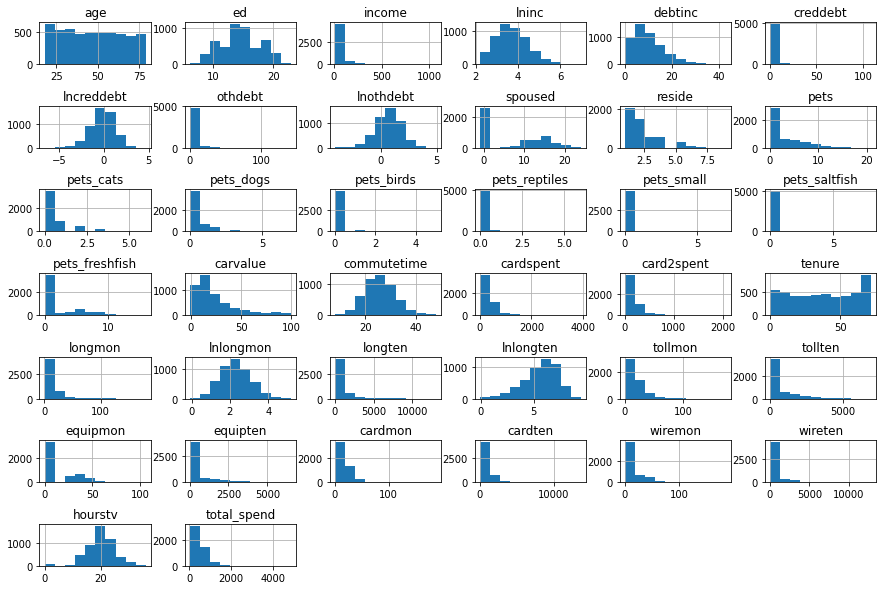

In [32]:
df_num_vars.hist(figsize = (15,10))
plt.subplots_adjust(hspace= 1.0);

__Total spend highly skewed. We can take the log to see how it changes__

<AxesSubplot:ylabel='Frequency'>

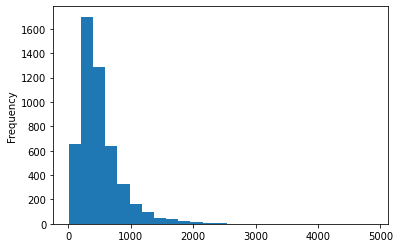

In [33]:
df_num_vars['total_spend'].plot(kind = 'hist', bins = 25)

<AxesSubplot:ylabel='Frequency'>

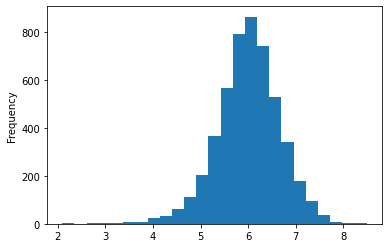

In [34]:
df_num_vars['total_spend_ln'] = np.log(df_num_vars['total_spend'])
df_num_vars['total_spend_ln'].plot(kind='hist',bins=25)

## Creating Summary Statistics (including various quantile ranges)

In [35]:
def num_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['COUNT', 'NULL', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary = df_num_vars.apply(lambda x: num_var_summary(x)).T

In [36]:
num_summary

,COUNT,NULL,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,3.157849e+02,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,1.076550e+01,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
income,5000.0,0.0,2.737980e+05,54.759600,38.000000,55.377511,3.066669e+03,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
lninc,5000.0,0.0,1.849955e+04,3.699909,3.637586,0.747072,5.581164e-01,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,4.095723e+01,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
creddebt,5000.0,0.0,9.286628e+03,1.857326,0.926437,3.415732,1.166722e+01,0.000000,0.033160,0.101088,0.175682,0.385520,0.926437,2.063820,4.299470,6.373010,14.280358,109.072596
lncreddebt,4999.0,1.0,-6.521372e+02,-0.130454,-0.076106,1.273058,1.620678e+00,-6.597334,-3.401690,-2.291604,-1.737842,-0.952685,-0.076106,0.724665,1.458625,1.852297,2.658910,4.692014
othdebt,5000.0,0.0,1.827230e+04,3.654460,2.098540,5.395172,2.910788e+01,0.000000,0.114299,0.287692,0.457997,0.980301,2.098540,4.314780,8.062046,11.815981,24.064260,141.459150
lnothdebt,4999.0,1.0,3.483879e+03,0.696915,0.741537,1.128578,1.273689e+00,-4.092107,-2.168241,-1.243483,-0.780312,-0.018987,0.741537,1.462053,2.087178,2.469586,3.180802,4.952011
spoused,5000.0,0.0,3.056400e+04,6.112800,-1.000000,7.743518,5.996207e+01,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.000000,16.000000,18.000000,20.000000,24.000000


## Treating the outliers

Some of the variables like __income, creddebt, othdebt__ etc. contain outliers.

<AxesSubplot:ylabel='Frequency'>

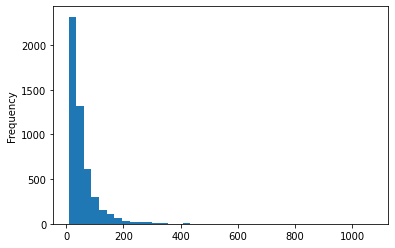

In [37]:
df_num_vars['income'].plot(kind = 'hist', bins = 40)

In [38]:
df_num_vars = df_num_vars.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))

<AxesSubplot:ylabel='Frequency'>

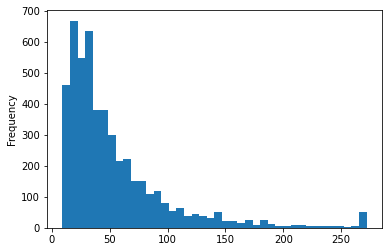

In [39]:
df_num_vars['income'].plot(kind = 'hist', bins = 40)

## Handling Missing Values

A few numerical columns still have missing values, so we can impute them

In [40]:
df_num_vars.isnull().sum().sort_values(ascending = False)

longten           3
lnlongten         3
commutetime       2
cardten           2
lncreddebt        1
lnothdebt         1
tollten           0
card2spent        0
tenure            0
longmon           0
lnlongmon         0
tollmon           0
age               0
equipmon          0
cardspent         0
cardmon           0
wiremon           0
wireten           0
hourstv           0
total_spend       0
equipten          0
carvalue          0
ed                0
reside            0
income            0
lninc             0
debtinc           0
creddebt          0
othdebt           0
spoused           0
pets              0
pets_freshfish    0
pets_cats         0
pets_dogs         0
pets_birds        0
pets_reptiles     0
pets_small        0
pets_saltfish     0
total_spend_ln    0
dtype: int64

In [41]:
def impute(x):
    x = x.fillna(x.mean())
    return x

df_num_vars = df_num_vars.apply(lambda x: impute(x))

In [42]:
df_num_vars.isnull().sum().sort_values(ascending = False)

age               0
tollten           0
card2spent        0
tenure            0
longmon           0
lnlongmon         0
longten           0
lnlongten         0
tollmon           0
equipmon          0
commutetime       0
equipten          0
cardmon           0
cardten           0
wiremon           0
wireten           0
hourstv           0
total_spend       0
cardspent         0
carvalue          0
ed                0
spoused           0
income            0
lninc             0
debtinc           0
creddebt          0
lncreddebt        0
othdebt           0
lnothdebt         0
reside            0
pets_freshfish    0
pets              0
pets_cats         0
pets_dogs         0
pets_birds        0
pets_reptiles     0
pets_small        0
pets_saltfish     0
total_spend_ln    0
dtype: int64

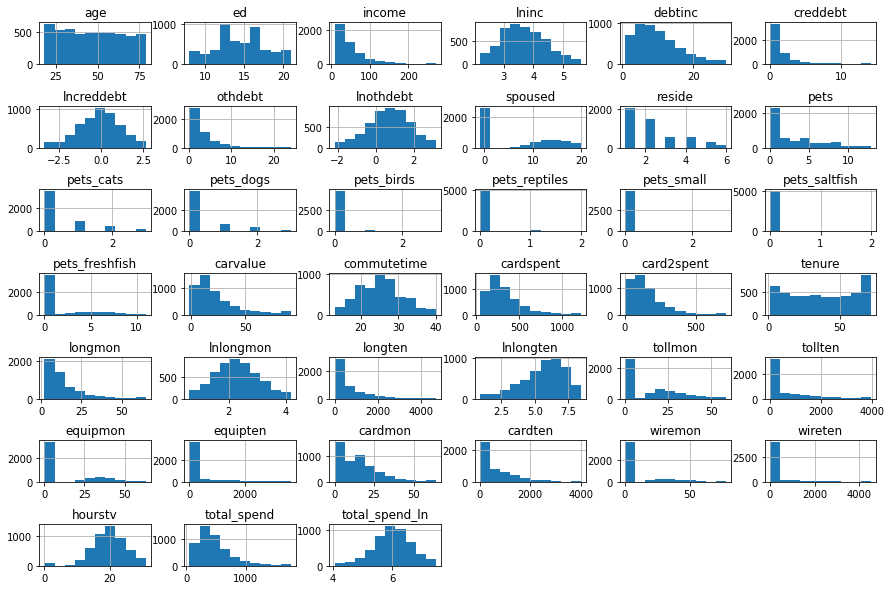

In [43]:
# Checking the disribution of feature values again

df_num_vars.hist(figsize = (15,10))
plt.subplots_adjust(hspace= 1.0);

Now, we have somewhat clean data set. Next will be EDA, pre-processing